# Deep Reinforment Learning Project 1 - Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### Project Set Up

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed all the necessary packages from the set up guide and requirements.txt

# Training a DeepRL agent to solve the Unity Banana Collector task

## 1. Import the Necessary Packages

In [1]:
# Standard
from unityagents import UnityEnvironment
import numpy as np

In [2]:
# Standard
import random
import torch
import numpy as np
from collections import deque
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Add-on : Set plotting options
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)
# Add-on : Hide Matplotlib deprecate warnings
import warnings
warnings.filterwarnings("ignore")


# High resolution plot outputs for retina display
%config InlineBackend.figure_format = 'retina'

## 2. Create the environment

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## 3. Prepare for training

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 4. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment. At each time step, it has four actions at its disposal:

 - 0 - walk forward
 - 1 - walk backward
 - 2 - turn left
 - 3 - turn right

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction. A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.    0.    0.    0.    0.844 0.    0.    1.    0.    0.075 0.    1.    0.    0.    0.258 1.    0.    0.    0.
 0.742 0.    1.    0.    0.    0.259 0.    0.    1.    0.    0.094 0.    1.    0.    0.    0.32  0.    0.   ]
States have length: 37


## 5. Take Random Actions in the Environment

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


## 6. Initialize the agent

## Instructions

To watch a trained smart agent, follow the instructions below:

 * DQN: If you want to run the original DQN algorithm, use the checkpoint dqn.pth for loading the trained model. Also, choose the parameter qnetwork as QNetwork while defining the agent and the parameter update_type as dqn.
 
 * Double DQN: If you want to run the Double DQN algorithm, use the checkpoint ddqn.pth for loading the trained model. Also, choose the parameter qnetwork as QNetwork while defining the agent and the parameter update_type as double_dqn.
 
 * Dueling Double DQN: If you want to run the Dueling Double DQN algorithm, use the checkpoint dddqn.pth for loading the trained model. Also, choose the parameter qnetwork as DuelingQNetwork while defining the agent and the parameter update_type as double_dqn.

In [7]:
from dqn_agent import Agent
from model import QNetwork, DuelingQNetwork

# initialize the agent for DQN
#agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='dqn', seed=0)

# initialize the agent for DQN
agent = Agent(state_size=state_size, action_size=action_size, qnetwork=QNetwork, update_type='double_dqn', seed=0)

# uncomment the line below to use a dueling architecture
#agent = Agent(state_size=state_size, action_size=action_size, qnetwork=DuelingQNetwork, update_type='double_dqn', seed=0)

## 7. Train the Agent with DQN

Run the code cell below to train the agent from scratch.

In [8]:
def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay):
    """
    Deep Q-learning
    
    Params
    ======
        n_episodes (int): number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy policy 
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) to decrease epsilon
    """
    
    scores = []                                               # list containing scores from each episode                 
    scores_window = deque(maxlen=100)                         # store only the last 100 scores
    eps = eps_start                                           # initialize epsilon (for epsilon-greedy policy)
    
    for i_episode in range(1, n_episodes + 1):                # run n_episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment
        state = env_info.vector_observations[0]               # get the initial state
        score = 0                                             # initialize the score
        
        for t in range(max_t):                                # run for maximum of max_t timesteps 
            action = agent.act(state, eps).astype(int)                   # select the action
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]      # get the state
            reward = env_info.rewards[0]                      # get the reward
            done = env_info.local_done[0]                     # whether the episode is complete or not
            
            agent.step(state, action, reward, next_state, done)  # train the agent 
            score += reward                                      # update the score
            
            state = next_state                                   # update the state
            if done:                                             # break if episode is complete
                break
        
        scores_window.append(score)                # update the window of scores
        scores.append(score)                       # update the list of scores
        eps = max(eps_end, eps * eps_decay)        # modify epsilon
        average_score = np.mean(scores_window)
        print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(i_episode, average_score))
            
        if average_score >= 13:      # check if environment is solved
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(i_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), 'ddqn.pth')
            break
    
    return scores

In [9]:
# parameters

n_episodes = 5000
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.995

In [10]:
# train the agent
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay)

Episode 100 	Average score:  0.77
Episode 200 	Average score:  4.54
Episode 300 	Average score:  7.90
Episode 400 	Average score:  11.19
Episode 469 	Average score:  13.01
Environment solved in  369 episodes!	Average Score:  13.01


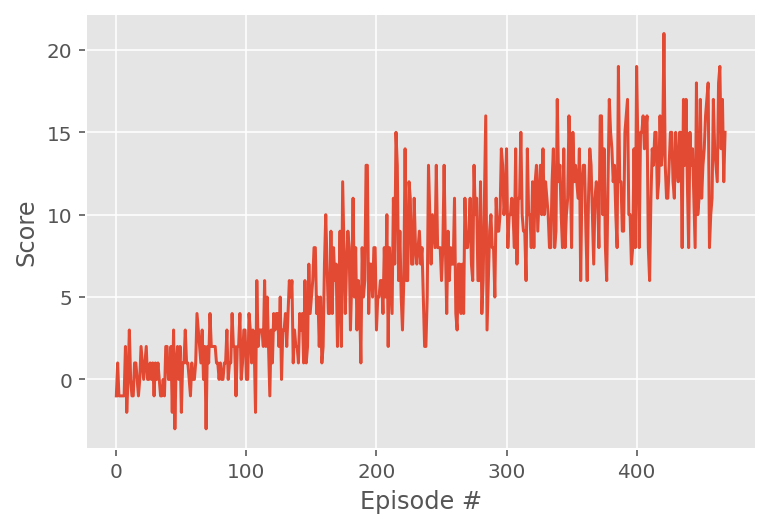

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('results/ddqn_new_scores.png', bbox_inches='tight')
plt.show()

## 8. Watch a trained model in action

Choose the checkpoint to load as per the variant of DQN used. If the original DQN is used without any changes, load the checkpoint dqn.pth, for Double DQN use ddqn.pth, for Dueling Double DQN use dddqn.pth.

In [12]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state).astype(int)          # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [13]:
#env.close()

In [14]:
env.close()

## 9. Ideas for future work

 - This model was a simple DQN network, we even tried double q-learning and, switch to a dueling dqn architecture.
 - we can obviously implement DQN improved algorithms such as Prioritized Experience Replay, Dueling, Rainbow to get better result.
 - Also a systematic exploration of the hyperparameters, several Neural Networks architecture, could help us to build an agent that would learn faster.
 - We can see if the Google Deepmind ConvNet architecture generalizes to this environment.